In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def load_image(file_name):
    with open(file_name, "rb") as f:
        magic_number = int.from_bytes(f.read(4), "big")
        image_count  = int.from_bytes(f.read(4), "big")
        image_row    = int.from_bytes(f.read(4), "big")
        image_column = int.from_bytes(f.read(4), "big")
        image_data   = f.read()
        image        = np.frombuffer(image_data,dtype=np.uint8).reshape(image_count, image_row, image_column)
    return image

def load_label(file_name):
    with open(file_name, "rb") as f:
        magic_number = int.from_bytes(f.read(4), "big")
        image_count  = int.from_bytes(f.read(4), "big")
        image_data   = f.read()
        image        = np.frombuffer(image_data,dtype=np.uint8)
    return image

In [17]:
train_mnist_img = load_image("./dataset/train-images.idx3-ubyte")
train_mnist_label = load_label("./dataset/train-labels.idx1-ubyte")
test_mnist_img = load_image("./dataset/t10k-images.idx3-ubyte")
test_mnist_label = load_label("./dataset/t10k-labels.idx1-ubyte")

＃＃BLOCK 1 แสดง ภาพตัวอย่าง เลขแบบสุ่ม เลขละ 5 ภาพ รวม 50 ภาพ กดแต่ละครั้งต้องไม่ซ้ำ

ตัวเลข 0: 5 ครั้ง
ตัวเลข 1: 5 ครั้ง
ตัวเลข 2: 5 ครั้ง
ตัวเลข 3: 5 ครั้ง
ตัวเลข 4: 5 ครั้ง
ตัวเลข 5: 5 ครั้ง
ตัวเลข 6: 5 ครั้ง
ตัวเลข 7: 5 ครั้ง
ตัวเลข 8: 5 ครั้ง
ตัวเลข 9: 5 ครั้ง


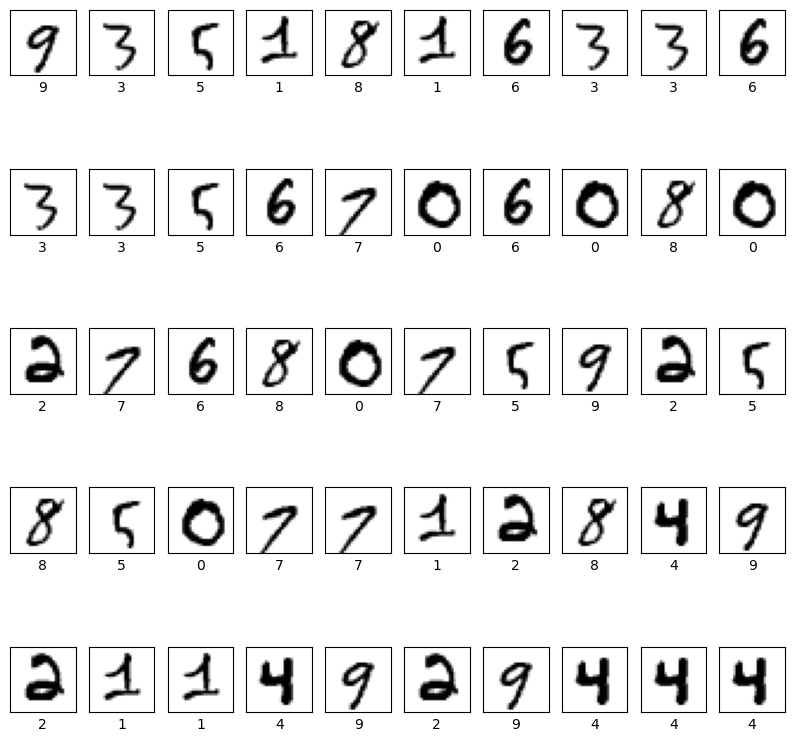

In [18]:
random_indices = []
count_dict = {i: 0 for i in range(10)}
consecutive_duplicates = {i: 0 for i in range(10)}
max_consecutive_duplicates = 5  # จำนวนครั้งสูงสุดที่ตัวเลขจะสามารถซ้ำกันได้

while len(random_indices) < 50:
    # สุ่มตัวเลขใหม่
    new_random = np.random.randint(0, 10)
    # ตรวจสอบว่าตัวเลขนี้เกิดขึ้นซ้ำกันเกินจำนวนสูงสุดหรือไม่
    if consecutive_duplicates[new_random] >= max_consecutive_duplicates:
        continue  # ถ้าซ้ำเกินจำนวนสูงสุดให้ข้ามไป
    else:
        consecutive_duplicates[new_random] += 1
    
    # เพิ่มตัวเลขลงในรายการ random_indices
    random_indices.append(new_random)
    count_dict[new_random] += 1

plt.figure(figsize=(10, 10))

for i, idx in enumerate(random_indices):
    plt.subplot(5, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im = train_mnist_img[train_mnist_label == idx][count_dict[idx]]
    plt.imshow(im, plt.cm.binary)
    plt.xlabel(idx)
    
for digit, count in count_dict.items():
    print(f'ตัวเลข {digit}: {count} ครั้ง')

plt.show()


In [19]:
#pip install tensorflow 

In [20]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(train_mnist_label,10)
y_test = tf.keras.utils.to_categorical(test_mnist_label,10)
train_data = train_mnist_img.reshape(train_mnist_img.shape[0],-1)
test_data = test_mnist_img.reshape(test_mnist_img.shape[0],-1)


In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1025,input_shape=(784,), activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units = 255, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units = 10, activation=tf.keras.activations.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1025)              804625    
                                                                 
 dense_1 (Dense)             (None, 255)               261630    
                                                                 
 dense_2 (Dense)             (None, 10)                2560      
                                                                 
Total params: 1068815 (4.08 MB)
Trainable params: 1068815 (4.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = [tf.keras.metrics.categorical_accuracy]
    )

In [23]:
history = model.fit(train_data, 
                    y_train, 
                    batch_size=1000, 
                    shuffle=True, 
                    epochs=200
                    )

Epoch 1/200
60/60 [==============================] - 4s 50ms/step - loss: 17.2113 - categorical_accuracy: 0.7961
Epoch 2/200
60/60 [==============================] - 3s 50ms/step - loss: 0.7127 - categorical_accuracy: 0.9254
Epoch 3/200
60/60 [==============================] - 3s 48ms/step - loss: 0.3567 - categorical_accuracy: 0.9468
Epoch 4/200
60/60 [==============================] - 3s 54ms/step - loss: 0.2161 - categorical_accuracy: 0.9624
Epoch 5/200
60/60 [==============================] - 3s 51ms/step - loss: 0.1439 - categorical_accuracy: 0.9712
Epoch 6/200
60/60 [==============================] - 3s 54ms/step - loss: 0.0950 - categorical_accuracy: 0.9789
Epoch 7/200
60/60 [==============================] - 3s 54ms/step - loss: 0.0621 - categorical_accuracy: 0.9846
Epoch 8/200
60/60 [==============================] - 3s 51ms/step - loss: 0.0412 - categorical_accuracy: 0.9889
Epoch 9/200
60/60 [==============================] - 3s 48ms/step - loss: 0.0271 - categorical_accuracy

____________________________________________________________________________________________________
##BLOCK 2 แสดง ค่าความแม่นยำของ model

In [24]:
_, acc = model.evaluate(train_data, y_train)
print(acc," OR ",(acc*100),"%")

1875/1875 [==============================] - 5s 3ms/step - loss: 8.5090e-07 - categorical_accuracy: 1.0000
1.0  OR  100.0 %


#ลองทดสอบ BLOCK2 ดู ว่าถูกต้องไหม

1/1 [==============================] - 0s 80ms/step


(-0.5, 27.5, 27.5, -0.5)

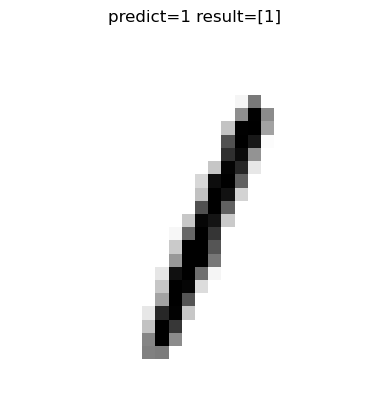

In [25]:
idx = np.random.randint(1,10000,1)
data = train_data[idx]
result = model.predict(data)
show_label = np.argmax(result)
#               ค่าพยากรณ์                   ผลเฉลย
plt.title(f"predict={show_label} result={train_mnist_label[idx]}")
plt.imshow(train_mnist_img[idx][0],plt.cm.binary)
plt.axis("off")

______________________________________________________________________________________________________________________________________
##BLOCK 3 แสดง ผลการพิสูจน์ เลข จากชุด test dataset ทุกเลข 10000 ค่า 

In [26]:
wrong = 0
correct = 0
for i in range(1000):
    idx = np.random.randint(1,10000,1)
    data = test_data[idx]
    result = model.predict(data, verbose=0)
    p_class = np.argmax(result)
    ans = test_mnist_label[idx]
    if(p_class != ans):
        wrong = wrong+1
        print("Num of Wrong :",wrong," Number :" , p_class," Result", ans)
    else:
        correct = correct+1
print("\nCheck 1000 Round total correct :",correct," total wrong :",wrong)

Num of Wrong : 1  Number : 8  Result [2]
Num of Wrong : 2  Number : 7  Result [8]
Num of Wrong : 3  Number : 5  Result [3]
Num of Wrong : 4  Number : 5  Result [9]
Num of Wrong : 5  Number : 8  Result [1]
Num of Wrong : 6  Number : 9  Result [4]
Num of Wrong : 7  Number : 7  Result [9]
Num of Wrong : 8  Number : 6  Result [2]
Num of Wrong : 9  Number : 0  Result [6]
Num of Wrong : 10  Number : 8  Result [3]
Num of Wrong : 11  Number : 9  Result [3]
Num of Wrong : 12  Number : 9  Result [8]
Num of Wrong : 13  Number : 6  Result [5]
Num of Wrong : 14  Number : 8  Result [9]
Num of Wrong : 15  Number : 6  Result [5]
Num of Wrong : 16  Number : 5  Result [7]
Num of Wrong : 17  Number : 8  Result [9]
Num of Wrong : 18  Number : 6  Result [0]
Num of Wrong : 19  Number : 3  Result [5]
Num of Wrong : 20  Number : 0  Result [5]
Num of Wrong : 21  Number : 5  Result [3]
Num of Wrong : 22  Number : 3  Result [2]
Num of Wrong : 23  Number : 0  Result [6]
Num of Wrong : 24  Number : 7  Result [6]
N

_______________________________________________________________________________________________
##BLOCK 4 เมื่อสุ่ม 100 ค่า จากชุด train ผิดกี่ภาพ

In [ ]:
wrong = 0
for i in range(100):
    idx = np.random.randint(1,10000,1)
    data = train_data[idx]
    result = model.predict(data, verbose=0)
    p_class = np.argmax(result)
    ans = train_mnist_label[idx]
    if(p_class != ans):
        wrong = wrong+1
print("Check train 100 Round"," total wrong : ",wrong)

Check train 100 Round  total wrong :  0


_____________________________________________________________________________
##BLOCK 5 เมื่อสุ่ม 100 ค่า จากชุด test ผิดกี่ภาพ

In [ ]:
wrong = 0
for i in range(100):
    idx = np.random.randint(1,10000,1)
    data = test_data[idx]
    result = model.predict(data, verbose=0)
    p_class = np.argmax(result)
    ans = test_mnist_label[idx]
    if(p_class != ans):
        wrong = wrong+1
print("Check test 100 Round"," total wrong : ",wrong)

Check test 100 Round  total wrong :  1
